# Описание и цель исследования:

Были подготовлены результаты тестирования гипотез для увеличения выручки интернет-магазина. Из этих данных следует сделать выводы, успешен ли эксперимент, или он никак значимо не повлиял на продажи.

Для этого следует:
1. Сделать первичный анализа имеющихся у нас данных. 
2. Приоритизировать имеющиеся гипотезы. Можно использовать два метода приоритизации, а затем сравнить топ гипотез в обоих случаях. 
3. Провести анализ результатов эксперимента на основе выручки, среднего чека, конверсии двух групп эксперимента. И следует провести анализ еще раз, не учитывая выбросы в данных с заказами. 

## Используемые библиотеки

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import math as mth
from scipy import stats as st
import scipy.stats as stats

## Приоритизация гипотез

In [2]:
# рассмотрим таблицу с гипотезами

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
# приведем названия столбцов к нижнему регистру

hypothesis.columns =  hypothesis.columns.str.lower()

### Приоритизация методом ICE

In [4]:
def ice_score(row):
    ice = (row['impact'] * row['confidence']) / row['efforts']
    return ice

hypothesis['ice_score'] = hypothesis.apply(ice_score, axis = 1)
hypothesis = hypothesis.sort_values(by = 'ice_score', ascending = False)
pd.options.display.max_colwidth = 1
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


### Приоретизация методом RICE

In [5]:
def rice_score(row):
    rice = (row['reach'] * row['impact'] * row['confidence']) / row['efforts']
    return rice
hypothesis['rice_score'] = hypothesis.apply(rice_score, axis = 1)
hypothesis.sort_values(by = 'rice_score', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


### Вывод:


1. В таблице с гипотезами были созданы два столбца с оценкой задачи для их приоритизации. Отличие двух использвоанных методов, ICE и RICE, в том, что RICE учитывает и количество пользователей, которых затронет изменение, предлагаемое в гипотезе. Чем выше это количество, тем она важней. Поэтому топ приоритетных гипотез может различаться в зависимости от метода.
2. Топ-3 приоритетных гипотез для ICE: гипотезы с индексом 8, 0, 7. Для RICE: 7, 2, 0. На последнем мете в обоих случаях гипотеза 4.
3. Так как метод RICE учитывает больше фаторов, лучше принимать именно его результаты. 

## Анализ A/B-теста

### Исследование данных

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
display(orders.head(5))
display(orders.info())
display(visitors.head(5))
display(visitors.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [7]:
# изменим названия столбцов в таблице orders
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [8]:
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


In [9]:
group_a = orders[orders['group'] == 'A']['visitor_id']
group_a = group_a.reset_index()
group_b = orders[orders['group'] == 'B']['visitor_id']
group_b = group_b.reset_index()
display(group_a)
display(group_b)
both_groups = group_a.merge(group_b, how = 'inner', on = 'visitor_id')
display(both_groups)
list_of_duplicated_users = both_groups['visitor_id'].unique()
print(list_of_duplicated_users)

,index,visitor_id
0,2,4069496402
1,7,78758296
2,8,295230930
3,10,879864040
4,12,3213223594
...,...,...
552,1187,132143192
553,1188,1022829655
554,1193,370388673
555,1194,573423106


,index,visitor_id
0,0,3312258926
1,1,3642806036
2,3,1196621759
3,4,2322279887
4,5,935554773
...,...,...
635,1189,393266494
636,1190,1197745035
637,1191,608641596
638,1192,3733762160


,index_x,visitor_id,index_y
0,2,4069496402,1070
1,26,199603092,246
2,134,199603092,246
3,823,199603092,246
4,1102,199603092,246
...,...,...,...
178,1167,4186807279,814
179,1167,4186807279,819
180,1173,2712142231,61
181,1178,2949041841,1184


[4069496402  199603092 3803269165 2378935119  237748145 4256040402
 2038680547 1738359350 2458001652 3891541246 2716752286 3656415546
 2686716486 2954449915 2927087541 3234906277  457167155 2579882178
 3957174400 1648269707 2780786433  818047933 2044997962 1959144690
 3202540741 1333886533  351125977 3951559397  393266494 3984495233
 4120364173 4266935830 1230306981 1294878855 1614305549    8300375
  477780734 1668030113 3717692402 3766097110 3941795274  471551937
 1316129916 1801183820 1602967004 2587333274 2600415354  232979603
 3972127743 1404934699  276558944 3062433592 2654030115 3963646447
 4186807279 2712142231 2949041841  963407295]


In [10]:
# удаляем пользователей, которые попали в обе группы

orders = orders[orders['visitor_id'].isin(list_of_duplicated_users) == False]
print(orders.info())        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1016 non-null   int64 
 1   visitor_id      1016 non-null   int64 
 2   date            1016 non-null   object
 3   revenue         1016 non-null   int64 
 4   group           1016 non-null   object
dtypes: int64(3), object(2)
memory usage: 47.6+ KB
None


In [11]:
# изменим тип данных в столбцах с датами
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) 
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [12]:
# таблица с кумулятивными выручкой, кол-вом заказов, средним чеком, конверсией и относительным изменением комулятивного ср. чека группы В к А и конверсией
dates_groups = orders[['date','group']].drop_duplicates() 
dates_groups
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'cumulative_orders', 'cumulative_buyers', 'cumulative_revenue', 'cumulative_visitors']
cumulative_data['avg_revenue_per_buyer'] = cumulative_data['cumulative_revenue'] / cumulative_data['cumulative_orders']
cumulative_data['cumulative_conevrsion'] = cumulative_data['cumulative_buyers'] / cumulative_data['cumulative_visitors']
cumulative_data = cumulative_data.merge(visitors, on = ['date', 'group'], how = 'outer')

display(cumulative_data.head(5)) 

,date,group,cumulative_orders,cumulative_buyers,cumulative_revenue,cumulative_visitors,avg_revenue_per_buyer,cumulative_conevrsion,visitors
0,2019-08-01,A,23,19,142779,719,6207.782609,0.026426,719
1,2019-08-01,B,17,17,59758,713,3515.176471,0.023843,713
2,2019-08-02,A,42,36,234381,1338,5580.500000,0.026906,619
3,2019-08-02,B,40,39,221801,1294,5545.025000,0.030139,581
4,2019-08-03,A,66,60,346854,1845,5255.363636,0.032520,507


###  Кумулятивная выручка

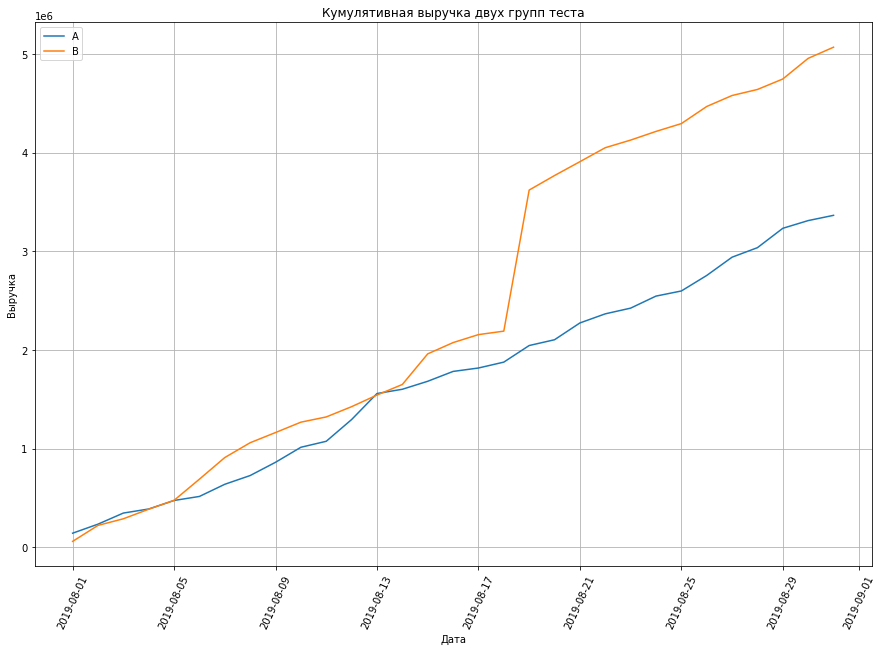

In [13]:
cumulative_a = cumulative_data.query("group == 'A'")
cumulative_b = cumulative_data.query("group == 'B'")

plt.figure(figsize = (15,10))
plt.plot(cumulative_a['date'], cumulative_a['cumulative_revenue'], label = 'A')
plt.plot(cumulative_b['date'], cumulative_b['cumulative_revenue'], label = 'B')
plt.title('Кумулятивная выручка двух групп теста')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation = 65)
plt.legend()
plt.grid();

### Вывод:

Графики кумулятивной выручки групп А и В стабильно растут. Показатель кумулятивной выручки группы В стабильно выше, чем у А. Но у обеих групп также есть и резкие скачки. У группы А точка резкого роста примерно 2019-08-11, а у группы В резкий скачок 2019-08-18. Это может сигнализировать о появляении очень дорогих заказов в выборках. Такие выбросы в дальнейшем анализе стоит убрать. 

### Кумулятивный средний чек

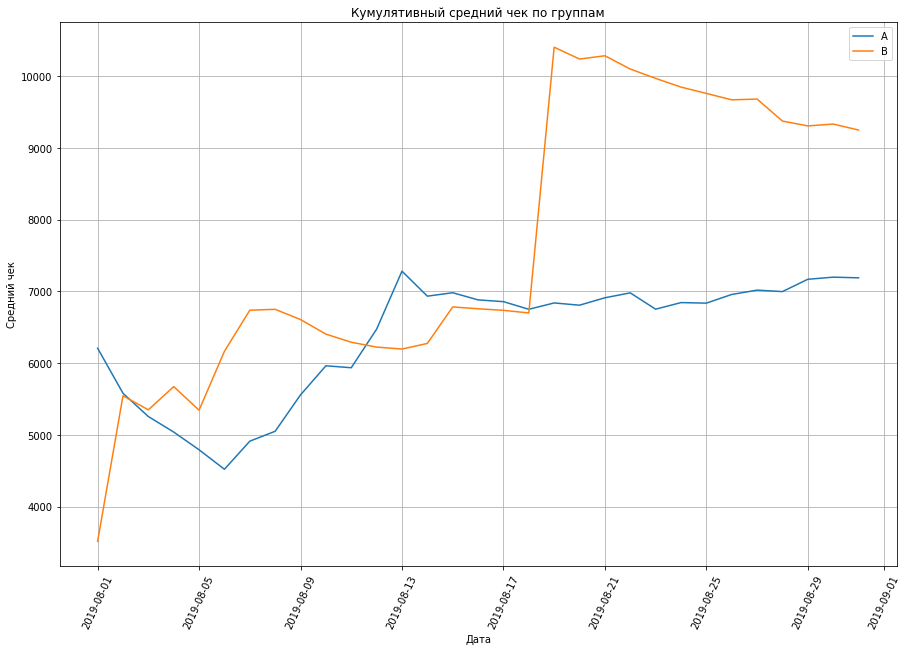

In [14]:
plt.figure(figsize = (15, 10))
plt.plot(cumulative_a['date'], cumulative_a['avg_revenue_per_buyer'], label = 'A')
plt.plot(cumulative_b['date'], cumulative_b['avg_revenue_per_buyer'], label = 'B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation = 65)
plt.legend()
plt.grid();

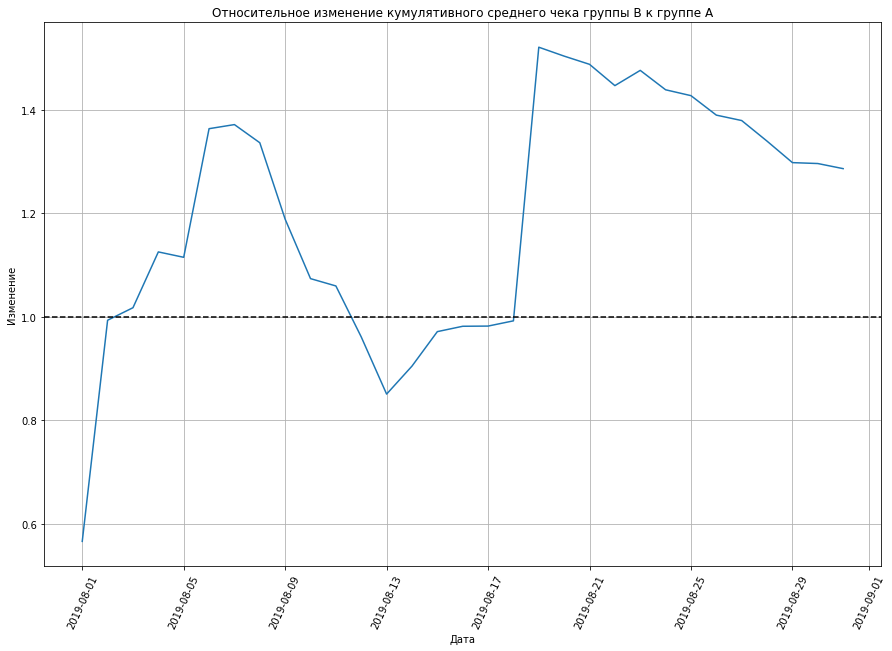

In [15]:
cumulative_a_b = cumulative_a.merge(cumulative_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize = (15, 10))
plt.plot(cumulative_a_b['date'], cumulative_a_b['avg_revenue_per_buyerB'] / cumulative_a_b['avg_revenue_per_buyerA'])
plt.axhline(y=1, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Изменение')
plt.xticks(rotation = 65)
plt.grid();

### Вывод:

1. При анализе кумулятивного среднего чека мы видим, очень варьирующиеся показатели у обеих групп. Показатели группы В, вероятней всего, еще не стабилизировались. У группы В было много точек резкого роста, что может быть связано с очень дорогими заказами. Но после того, как они прекратились, график продолжает снижаться, чтобы стабилизирвоаться после выбросов. Про график группы А можно сказать, что он стабилизовался к концу теста, несмотря на то, что график этой группы также сильно варьировался в первой половине теста, и были точки резкого роста значения. 
2. По графику относительного изменения кумулятивного среднего чека мы можем сказать, что он только начинает стабилизироваться. Мы видим много резких скачков графика, что является прямым следствием нестабильности отдельных графиков кумулятивных средних чеков каждой группы. Но примерно с 2019-08-29 график начинает стабильно двигаться по прямой. Но этого периода пока недостаточно, чтобы говорить о его стабилизации.

### Кумулятивная конверсия

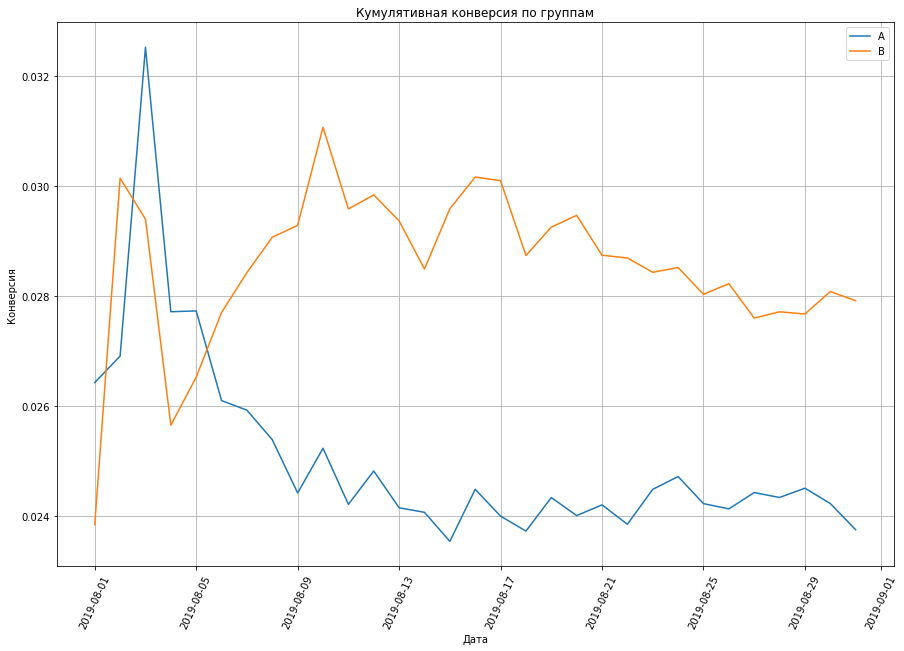

In [16]:
plt.figure(figsize = (15, 10))
plt.plot(cumulative_a['date'], cumulative_a['cumulative_conevrsion'], label = 'A')
plt.plot(cumulative_b['date'], cumulative_b['cumulative_conevrsion'], label = 'B')
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation = 65)
plt.grid()
plt.legend();

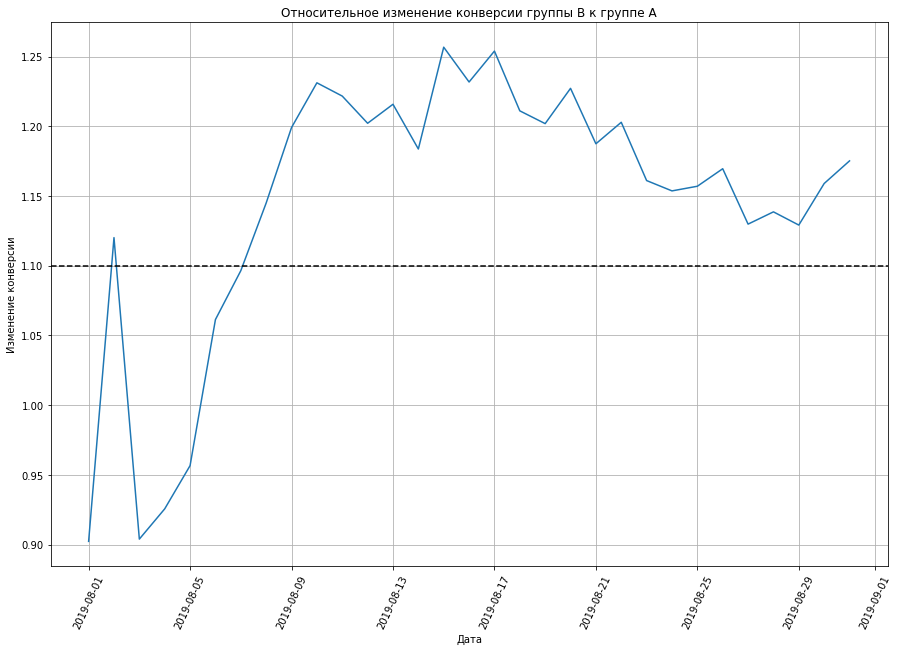

In [17]:
plt.figure(figsize = (15, 10))
plt.plot(cumulative_a_b['date'], cumulative_a_b['cumulative_conevrsionB'] / cumulative_a_b['cumulative_conevrsionA'])
plt.axhline(y = 1.10, color = 'black', linestyle = '--')
plt.title('Относительное изменение конверсии группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Изменение конверсии')
plt.xticks(rotation = 65)
plt.grid();

### Вывод:

1. Проанализировав графики кумулятивных конверсий групп А и В, мы видим, что оба графика только начинают выравниваться. Но говорить о том, что они стабилизировались еще рано.  В первой половине наблюдения в обеих группах были большие скачки конверсии, которые начали постепенно уменьшаться во второй половине. Это также, как в случае со средним чеком, возможно, следствие выбросов в количестве заказов. 
2. На гарфике относительного изменения конверсии группы В к группе А, мы видим, что график еще не установился в районе одного показателя. Это произойдет только при стабильных показателях конверсий по группам. 

### Количество заказов по пользователям

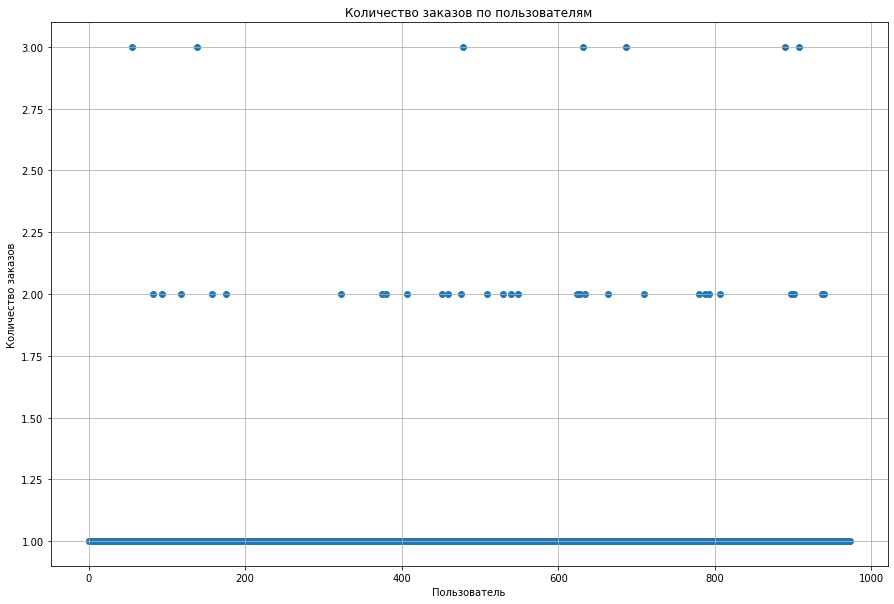

In [18]:
orders_by_users = orders.groupby('visitor_id', as_index = False).agg({'transaction_id': 'nunique'})
orders_by_users.columns = ['visitor_id', 'orders']
x_values = pd.Series(range(0, len(orders_by_users)))
plt.figure(figsize = (15, 10))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Количество заказов')
plt.grid();

In [19]:
print(orders_by_users['orders'].max())
print(orders_by_users['orders'].min())

3
1


In [20]:
# определяем 95 и 99 перцентили для количества заказов у каждого пользователя
print(np.percentile(orders_by_users['orders'], [95, 99]))

[1. 2.]


### Вывод: 

1. По точечному графику количества заказов на одного пользователя, мы видим, что количество заказов на одного пользователя варьируется от 1 до 3. Но большинство значений лежит в пределах двух заказов. 
2. С помощью занчения перцентилей, мы определили, что 95% всех пользователей совершали не больше двух заказов. А 99% пользователей не больше 4. Для дальнейшего анализа будет отброшен 1% выбивающихся значений, и взяты пользователи, у которых не больше двух заказов. 

### Стоимость заказов

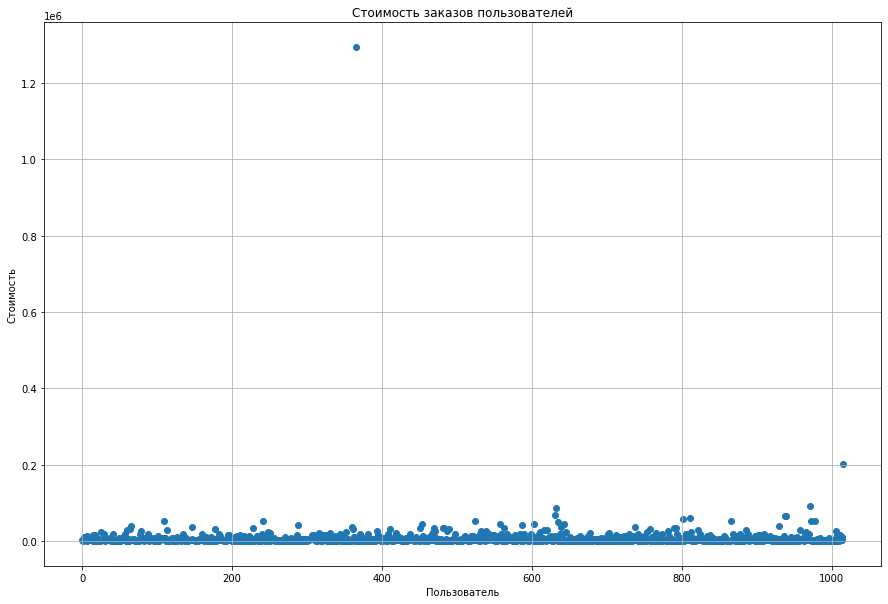

In [21]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize = (15, 10))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов пользователей')
plt.xlabel('Пользователь')
plt.ylabel('Стоимость')
plt.grid();

In [22]:
print(orders['revenue'].max())
print(orders['revenue'].min())

1294500
50


In [23]:
# 95 и 99 перцентили стоимостей заказов
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


### Вывод:

1. Был создан точечный график стоимостей заказов всех пользователей. Значения варьируются от 50 до 1294500.  На графике есть две точки, которые очевидно выбиваются из общего целого, но сделать более точные выводы по графику нельзя. 
2. Были рассчитаны 95 и 99 перцентили. 95% всех заказов не превышают по стоимости 28000. А 99% всех заказов не превышают по стоимости 58233. Для дальнейшего анализа будут отброшены 5% выбивающихся значений и взяты заказы стоимостью до 28000. 

### Различия конверсий групп по "сырым" данным

***Гипотезы:***

H0: конверсии двух групп теста не имеют статистически значимой разницы

H1: между конверсиями двух групп теста есть статистически значимая разница. 

In [31]:
orders_groupped = orders.groupby(['group', 'visitor_id'], as_index = False).agg({'visitor_id': 'count'})
display(orders_groupped.head(50))
conversion_a = orders_groupped.query('group == "A"')['visitor_id']
conversion_b = orders_groupped.query('group == "B"')['visitor_id']
visitors_per_date_a = cumulative_data[cumulative_data['group'] == 'A']['visitors']
visitors_per_date_b = cumulative_data[cumulative_data['group'] == 'B']['visitors']
sample_a = pd.concat([conversion_a, pd.Series(0, index=np.arange(visitors_per_date_a.sum() - len(conversion_a)), name='orders')],axis=0)
sample_b = pd.concat([conversion_b, pd.Series(0, index=np.arange(visitors_per_date_b.sum() - len(conversion_b)), name='orders')],axis=0) 

alpha = .05
conversions_comparison = st.mannwhitneyu(sample_a, sample_b)


print('p-значение: ', conversions_comparison[1])
if conversions_comparison[1] < alpha:
    print('Отвергаем нулевую гипотезу: между конверсиями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать конверсии разными'
    )

,group,visitor_id
0,A,1
1,A,1
2,A,1
3,A,1
4,A,1
5,A,1
6,A,1
7,A,1
8,A,1
9,A,1


p-значение:  0.011018084110014696
Отвергаем нулевую гипотезу: между конверсиями есть значимая разница


### Вывод:

Были проверены гипотезы: конверсии двух групп теста не имеют значимой разницы, или разница есть. Для этого были рассчитаны конверсии общего количества пользователей в покупателей в каждой группе за каждую дату проведения теста. Проведя статистический тест, мы отвергаем нулевую гипотезу, то есть считаем, что конверсии в двух группах имеют статистически значимую разницы.

### Различия среднего чека по "сырым" данным

***Гипотезы:***

H0: средние чеки двух групп теста не имеют статистически значимой разницы

H1: между средними чеками двух групп теста есть статистически значимая разница

In [25]:
avg_revenue = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('P-value:', avg_revenue)
if avg_revenue < alpha:
    print('Отвергаем нулевую гипотезу: между средними чеками есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными'
    )

P-value: 0.8294908998149533
Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными


### Вывод:

Был проведен статистический тест для двух гипотез: средние чеки двух групп не имеют значимой разницы, и разница есть. Согласно результату теста, у нас не получилось отвергнуть гипотезу о равенстве. Поэтому принимаем гипотезу об их равенстве. 

### Различия в конверсии по "очищенным" данным

***Гипотезы:***

H0: конверсии двух групп теста без учета выбросов не имеют статистически значимой разницы

H1: между конверсиями двух групп теста без учета выбросов есть статистически значимая разница. 

In [26]:
# удаляем из данным все выбросы и создаем новую таблицу конверсии 
cleared_orders = orders.query('revenue <= 28000')
cleared_users = orders_by_users.query('orders <= 2')
cleared_orders = cleared_orders[cleared_orders['visitor_id'].isin(cleared_users['visitor_id'])]
cleared_orders_group = cleared_orders.groupby(['group', 'visitor_id'], as_index = False).agg({'visitor_id': 'count'})

In [27]:
cleared_conversion_a = cleared_orders_group.query('group == "A"')['visitor_id']
cleared_conversion_b = cleared_orders_group.query('group == "B"')['visitor_id']
cleared_visitors_a = cumulative_data[cumulative_data['group'] == 'A']['visitors']
cleared_visitors_b = cumulative_data[cumulative_data['group'] == 'B']['visitors']
sample_a = pd.concat([cleared_conversion_a, pd.Series(0, index=np.arange(visitors_per_date_a.sum() - len(cleared_conversion_a)), name='orders')],axis=0)
sample_b = pd.concat([cleared_conversion_b, pd.Series(0, index=np.arange(visitors_per_date_b.sum() - len(cleared_conversion_b)), name='orders')],axis=0)

alpha = .05
conversions_comparison = st.mannwhitneyu(sample_a, sample_b)

print('p-значение: ', conversions_comparison[1])
if conversions_comparison[1] < alpha:
    print('Отвергаем нулевую гипотезу: между конверсиями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать конверсии разными'
    )

p-значение:  0.010477648793164535
Отвергаем нулевую гипотезу: между конверсиями есть значимая разница


### Вывод: 

Был проведен статистический тест для двух гипотез на основе данных без выбросов: конверсии в двух группах имеют значимую разницу, или не имеют. Согласно статистическому тесту, конверсии двух групп имеют статистически значимую разницу, как и в случае с неочищенными данными. 

### Различия в среднем чеке по "очищенным" данным

***Гипотезы:***

H0: средние чеки двух групп теста без учета выбросов не имеют статистически значимой разницы

H1: между средними чеками двух групп теста без учета выбросов есть статистически значимая разница

In [28]:
avg_revenue_cleared = stats.mannwhitneyu(cleared_orders[cleared_orders['group']=='A']['revenue'], cleared_orders[cleared_orders['group']=='B']['revenue'])[1]
print('P-value:', avg_revenue_cleared)
if avg_revenue_cleared < alpha:
    print('Отвергаем нулевую гипотезу: между средними чеками есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными'
    )

P-value: 0.7181252122463342
Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными


### Вывод:

Был проведен статистический тест проверки двух гипотез для очищенных данных: средние чеки двух групп равны, и средние чеки разные. Согласно результату теста, мы не отвергаем нулевую гипотезу, между средними чеками нет значимого различия. Как и в случае с тестом на данных с выбросами. 

## Общий вывод: 

1. После предварительного анализа предоставленных нам данных, были проведены операции для облегчения дальнейшей работы с ними, например, переименование столбцов или приведение данных к нужному типу. Также были выявлены пользователи, которые попали в обе группы тестирования. Эти пользователи были удалены, так как это уменьшит точность дальнейшего анализа проведенного тестирования.
2. Былп проведена приоритизация предлагаемых для исследования гипотез. Для этого взяты два фреймфорка: ICE и RICE. Второй учитывает больше параметров, чем первый. Поэтому в качестве результа была взята приоритизация RICE. Самой приритетная гипотеза: добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Она затрагивает все пользователей и может привести к серьезным изменениям. 
3. Затем был проведен анализ результатов проведения A/B тестирования на основе количества заказов, количества всех пользователей, выручки, среднего чека и конверсии.

***Результаты теста:***
1. Различие конверсии у двух групп теста статистичсеки значимо, как в случае со всем набором данных, так и в случае с "очищенными" от выбросов данными.
2. Средний чек не имеет статистически значимого различия у групп испытания, ни в полном наборе данных, ни в данных без выбросов. 
3. График относительного изменения конверсии группы В к группе А показывает, что результаты группы В стабильно лучше группы А. 
4. График относительного изменения среднего чека группы В к группе А более нестабилен, чем конверсия, но все равно к концу исследуемого периода группа В опережает группу А. 

***Решение по результатам теста:***

Остановить тест и зафиксировать победу группы В, так как несмотря на отсутсвие значимого различия в среднем чеке, конверсия в группе В выше. Соотвественно, если применить изменения для группы В на всех пользователей, покупателей станет больше. 
И несмотря на то, что график относительного изменения конверсии еще не стабилизировался, он стабильно показывает, что группа В имеет большую конверсию чем группа А.
